# Zero-Age Main Sequence Stellar Models

Figure 6.7 from Chapter 6 of *Stellar Structure & Evolution* Pinsonneault & Ryden, Cambridge University Press.

Plots of the stellar parameters for a grid of solar metallicity zero-age main sequence (ZAMS) stars computed
for this book using MESA.  The stars have masses of 0.3, 1, 3, 10, and 30 M<sub>sun</sub>.

The models are in the `ZAMS/` folder with these notebooks in raw ASCII format output by MESA, slightly
modified (removed #'s) to be more easily readable by pandas.

This is an 8-panel plot, 3x3 grid, 3:4 aspect ratio, with the key in the otherwise empty 9th panel at
the lower right corner.

In [9]:
%matplotlib inline

import os, sys, math
import numpy as np
import pandas as pd
import matplotlib
import matplotlib.pyplot as plt
from matplotlib.ticker import MultipleLocator, LogLocator, NullFormatter

import warnings
warnings.filterwarnings('ignore',category=UserWarning, append=True)

## Standard Plot Format

Setup the standard plotting format and make the plot.

In [10]:
plotFile = 'Fig6_7.png' 

# graphic aspect ratio = width/height

aspect = 3.0/4.0 # portrait

#
# Don't change these unless you really need to (we never have)
#
# fPage is the horizontal fraction of the page occupied by the figure, default 1.0
#
# scaleFac is the LaTeX includegraphics scaling in units of \textwidth, default 1.0
#

fPage = 1.0
scaleFac = 0.85

# Text width in inches - don't change, this is defined by the print layout

textWidth = 6.0 # inches

# Graphic dimensions depending on bitmap or vector format (draft vs production)

dpi = 600
plotWidth = dpi*fPage*textWidth
plotHeight = plotWidth/aspect
axisFontSize = 8
labelFontSize = 6
lwidth = 0.5
axisPad = 5
wInches = fPage*textWidth # float(plotWidth)/float(dpi)
hInches = wInches/aspect  # float(plotHeight)/float(dpi)
    
# LaTeX is used throughout for markup of symbols, Times-Roman serif font

plt.rc('text', usetex=True)
plt.rc('font', **{'family':'serif','serif':['Times-Roman'],'weight':'bold','size':'16'})

# Font and line weight defaults for axes

matplotlib.rc('axes',linewidth=lwidth)
matplotlib.rcParams.update({'font.size':axisFontSize})

# axis and label padding

plt.rcParams['xtick.major.pad']=f'{axisPad}'
plt.rcParams['ytick.major.pad']=f'{axisPad}'
plt.rcParams['axes.labelpad'] = f'{axisPad}'

## Stellar Models

The models are solar-metallicity ZAMs stars with masses of 0.3, 1, 3, 10, and 30 M<sub>sun</sub>, stored in
the raw ASCII format used by MESA. We read these files using pandas.

For this figure we need 9 data columns:
 * mass = enclosed mass in Msun
 * luminosity = enclosed luminosity in Lsun
 * logR = log10 of radius in Rsun
 * logP = log10 of pressure in dyne/cm^2
 * logRho = log10 of density in g/cm^3
 * logT = log10 of temperature in K
 * eps_nuc = nuclear energy generation rate in erg/g/s
 * log_opacity = $\kappa$, opacity in cm^2/g
 * gradr = $\nabla_{rad}$, radiative gradient $(d\ln T/d\ln P)_{rad}$
 
The first datum in each column is the surface of the star, the last is the center of the star.

Files are stored in the `ZAMS/` folder, with names like "`profile_m0.3_zams.txt` for an 0.3M<sub>sun</sub>
model.


In [11]:
dataDir = 'ZAMS'

massList = ['0.3','1','3','10','30']
lineType = [(0,(1,1)),(0,()),(0,(10,2)),(0, (3, 5, 1, 5)),(0,(4,2))]

# initialize empty dictionaries with the data arrays to plot

mass = {} # M/Msun
luminosity = {} # L/Lsun
radius = {} # r/Rsun
pressure = {} # pressure
rho = {} # density
temp = {} # temperature
eps = {} # nuclear energy generation rate
kappa = {} # opacity
gradr = {} # radiative gradient

# Load the arrays 

for m in massList:
    modelFile = f'{dataDir}/profile_m{m}_zams.txt'
    data = pd.read_csv(modelFile,sep=r'\s+',header=4)
    mass[m] = np.array(data['mass'])
    luminosity[m] = np.array(data['luminosity'])
    radius[m] = 10.0**np.array(data['logR'])
    pressure[m] = 10.0**np.array(data['logP'])
    rho[m] = 10.0**np.array(data['logRho'])
    temp[m] = 10.0**np.array(data['logT'])
    eps[m] = np.array(data['eps_nuc'])
    kappa[m] = 10.0**np.array(data['log_opacity'])
    gradr[m] = np.array(data['gradr'])
    

## Figure 6.7

9-panel plot, from left-to-right, top-to-bottom
 * panel a: P vs M
 * panel b: T vs M
 * panel c: $\rho$ vs M
 * panel d: R vs M
 * panel e: $\epsilon$ vs M
 * panel f: L vs M
 * panel g: $\kappa$ vs P
 * panel h: $\nabla_{\rm rad}$ vs P with line at $\nabla_{\rm rad}$=0.4
 * mass legend

All axes are logarithmic

Note: the code is not very pythonic, opting for brute force because of all the little variations

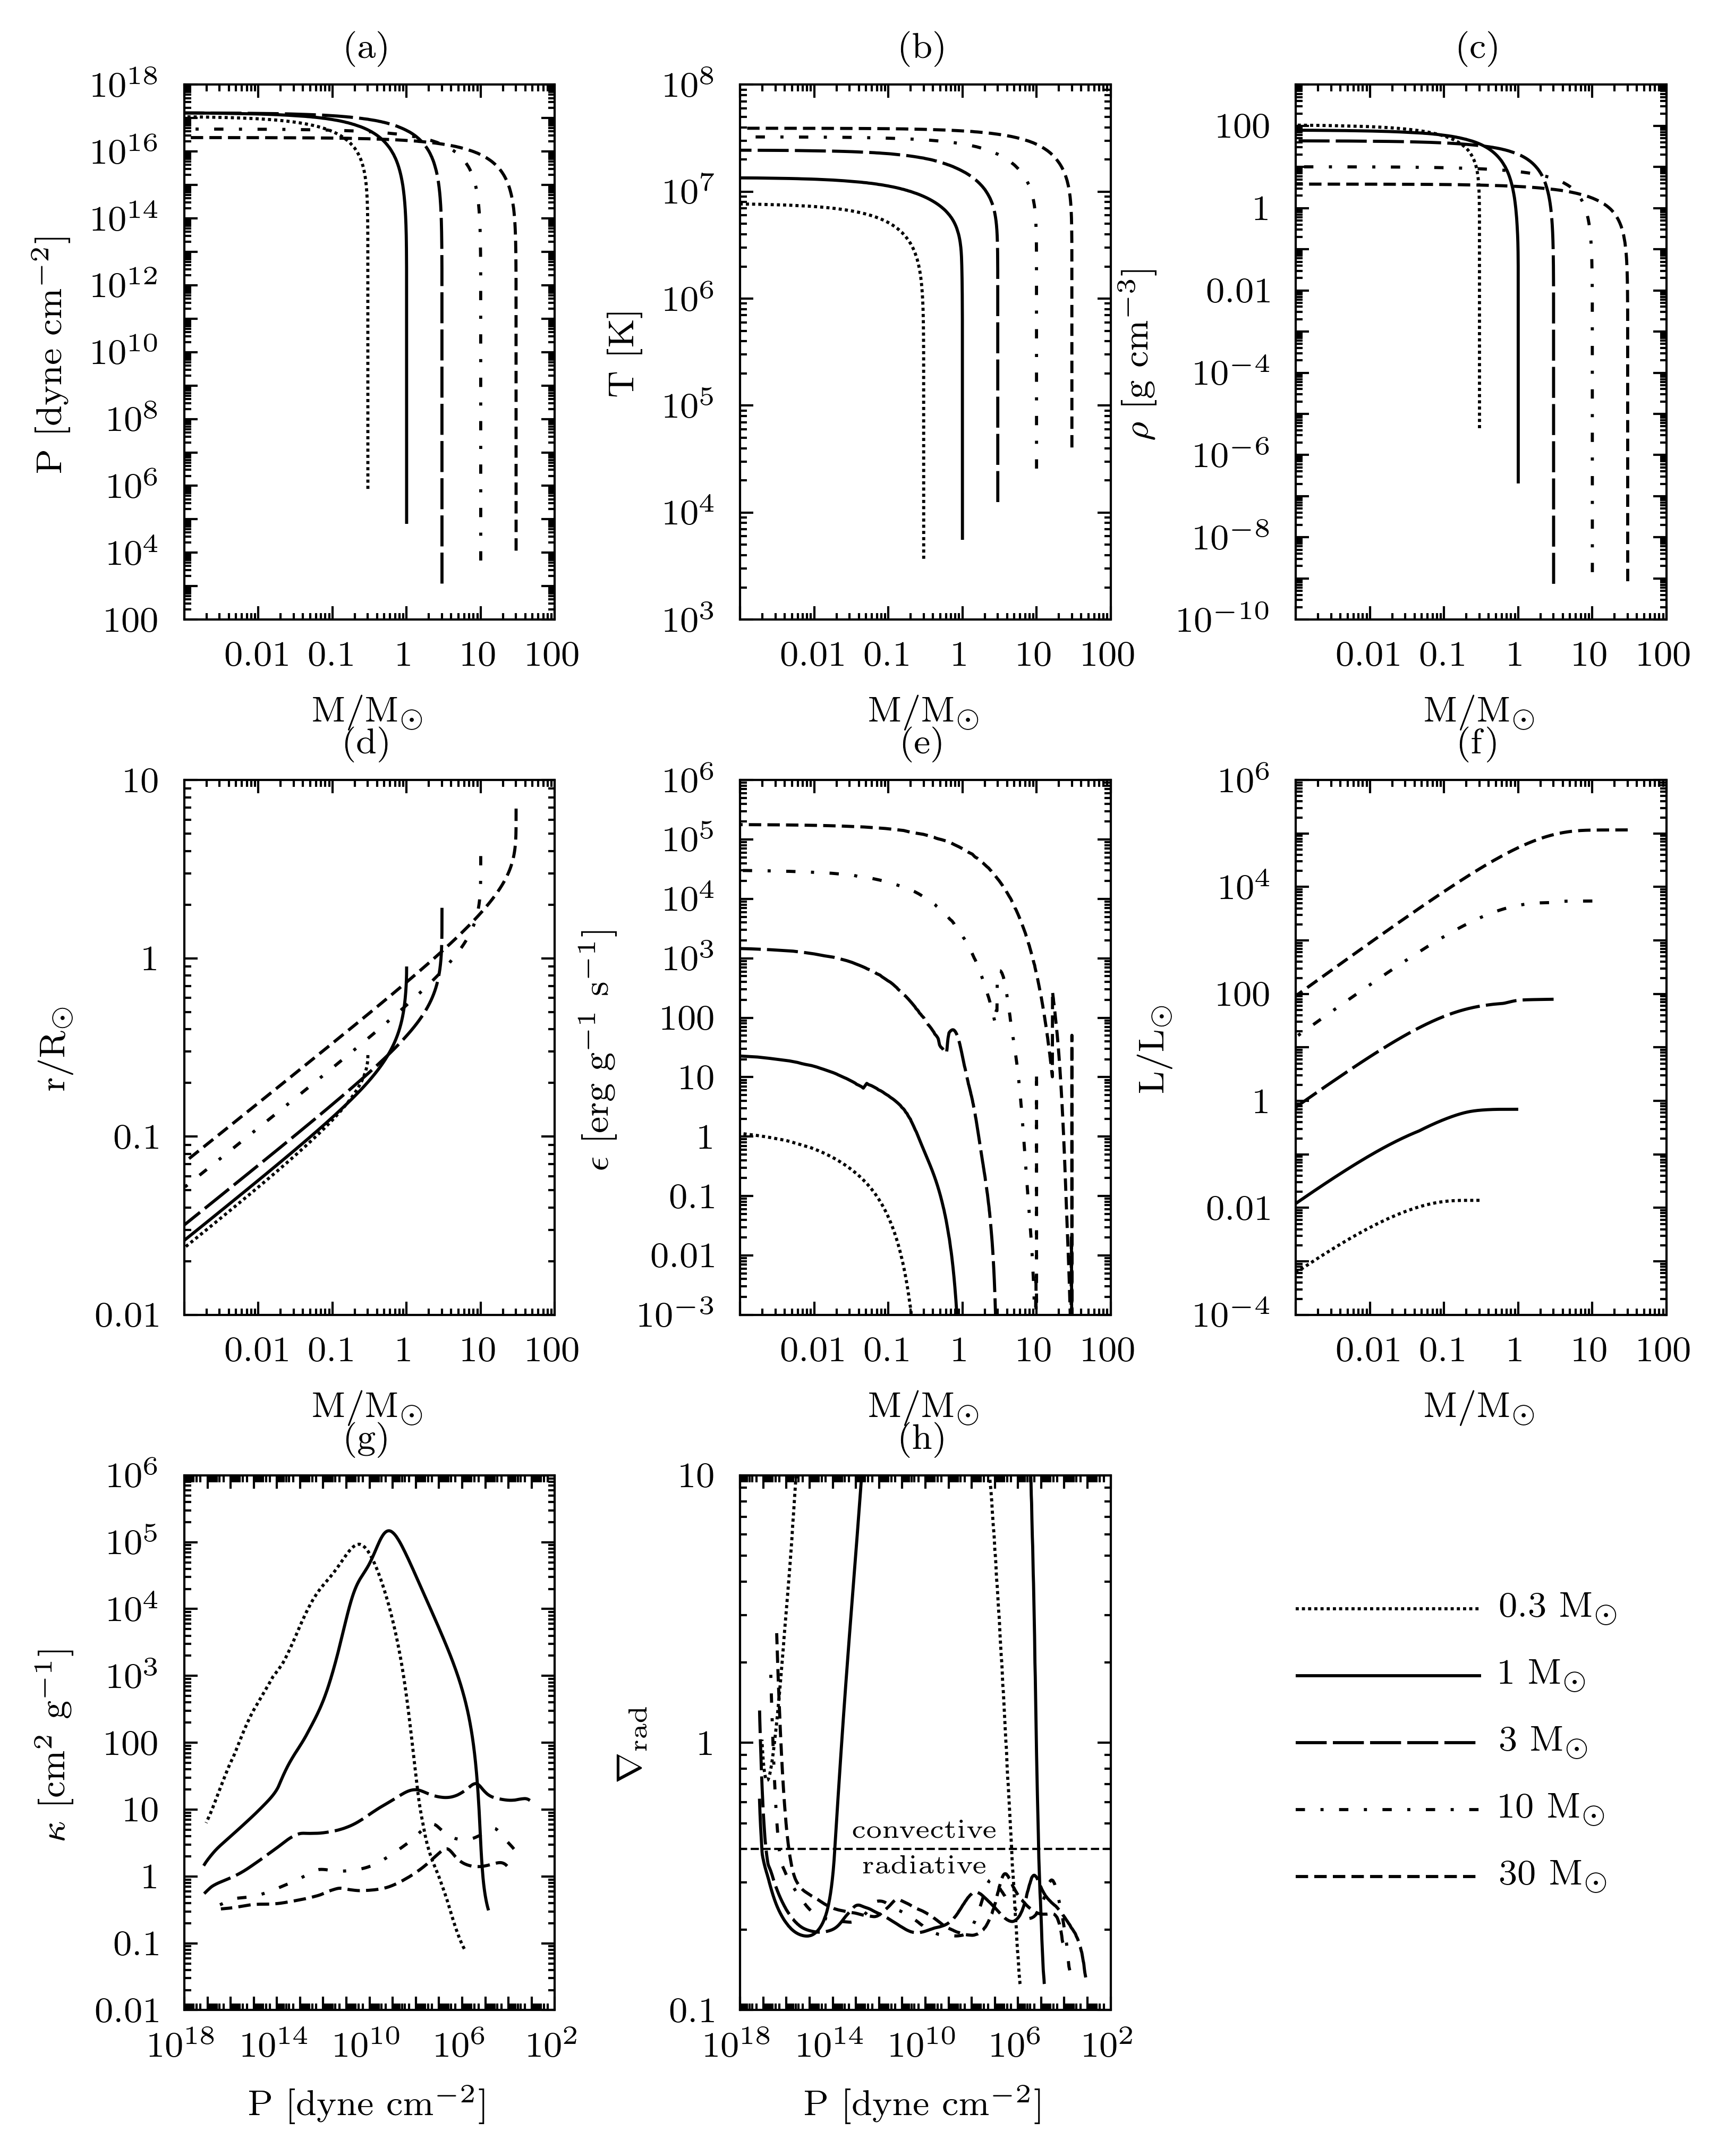

In [12]:
fig,ax = plt.subplots(3,3,figsize=(wInches,hInches),dpi=dpi)

fig.subplots_adjust(wspace=0.5, hspace=0.3)

# Mass Range

mMin = 0.001
mMax = 100.0

# Panel 1 (a) P vs M

ax[0,0].tick_params('both',length=3,width=lwidth,which='major',direction='in',top='on',right='on')
ax[0,0].tick_params('both',length=1.5,width=lwidth,which='minor',direction='in',top='on',right='on')

pMin = 1e2
pMax = 1e18

ax[0,0].set_xlim(mMin,mMax)
ax[0,0].set_xlabel(r'M/M$_\odot$',fontsize=axisFontSize)
ax[0,0].set_xscale('log')
ax[0,0].set_xticks([0.01,0.1,1,10,100])
ax[0,0].set_xticklabels(['0.01','0.1','1','10','100'])
ax[0,0].xaxis.set_major_locator(LogLocator(base=10.0,subs=(1.0,),numticks=100))
ax[0,0].xaxis.set_minor_locator(LogLocator(base=10.0,subs=np.arange(2,10)*0.1,numticks=100))
ax[0,0].xaxis.set_minor_formatter(NullFormatter())

ax[0,0].set_ylim(pMin,pMax)
ax[0,0].set_ylabel(r'P [dyne cm$^{-2}$]',fontsize=axisFontSize)
ax[0,0].set_yscale('log')
ax[0,0].yaxis.set_major_locator(LogLocator(base=10.0,subs=(1.0,),numticks=100))
ax[0,0].yaxis.set_minor_locator(LogLocator(base=10.0,subs=np.arange(2,10)*0.1,numticks=100))
ax[0,0].yaxis.set_minor_formatter(NullFormatter())
ax[0,0].set_yticks([1e2,1e3,1e4,1e5,1e6,1e7,1e8,1e9,1e10,1e11,1e12,1e13,1e14,1e15,1e16,1e17,1e18])
ax[0,0].set_yticklabels(['100','','10$^4$','','10$^6$','',r'10$^8$','','10$^{10}$','','10$^{12}$','',
                    '10$^{14}$','','10$^{16}$','','10$^{18}$'])

for i,m in enumerate(massList):
    ax[0,0].plot(mass[m],pressure[m],ls=lineType[i],color='black',lw=0.7)

# Panel 2 (b) T vs M

ax[0,1].tick_params('both',length=3,width=lwidth,which='major',direction='in',top='on',right='on')
ax[0,1].tick_params('both',length=1.5,width=lwidth,which='minor',direction='in',top='on',right='on')

tMin = 1e3
tMax = 1e8

ax[0,1].set_xlim(mMin,mMax)
ax[0,1].set_xlabel(r'M/M$_\odot$',fontsize=axisFontSize)
ax[0,1].set_xscale('log')
ax[0,1].set_xticks([0.01,0.1,1,10,100])
ax[0,1].set_xticklabels(['0.01','0.1','1','10','100'])
ax[0,1].xaxis.set_major_locator(LogLocator(base=10.0,subs=(1.0,),numticks=100))
ax[0,1].xaxis.set_minor_locator(LogLocator(base=10.0,subs=np.arange(2,10)*0.1,numticks=100))
ax[0,1].xaxis.set_minor_formatter(NullFormatter())

ax[0,1].set_ylim(tMin,tMax)
ax[0,1].set_ylabel(r'T [K]',fontsize=axisFontSize)
ax[0,1].set_yscale('log')

for i,m in enumerate(massList):
    ax[0,1].plot(mass[m],temp[m],ls=lineType[i],color='black',lw=0.7)

# Panel 3 (c) rho vs M

ax[0,2].tick_params('both',length=3,width=lwidth,which='major',direction='in',top='on',right='on')
ax[0,2].tick_params('both',length=1.5,width=lwidth,which='minor',direction='in',top='on',right='on')

rhoMin = 1e-10
rhoMax = 1e3

ax[0,2].set_xlim(mMin,mMax)
ax[0,2].set_xlabel(r'M/M$_\odot$',fontsize=axisFontSize)
ax[0,2].set_xscale('log')
ax[0,2].set_xticks([0.01,0.1,1,10,100])
ax[0,2].set_xticklabels(['0.01','0.1','1','10','100'])
ax[0,2].xaxis.set_major_locator(LogLocator(base=10.0,subs=(1.0,),numticks=100))
ax[0,2].xaxis.set_minor_locator(LogLocator(base=10.0,subs=np.arange(2,10)*0.1,numticks=100))
ax[0,2].xaxis.set_minor_formatter(NullFormatter())

ax[0,2].set_ylim(rhoMin,rhoMax)
ax[0,2].set_ylabel(r'$\rho$ [g cm$^{-3}$]',fontsize=axisFontSize)
ax[0,2].set_yscale('log')
ax[0,2].yaxis.set_major_locator(LogLocator(base=10.0,subs=(1.0,),numticks=100))
ax[0,2].yaxis.set_minor_locator(LogLocator(base=10.0,subs=np.arange(2,10)*0.1,numticks=100))
ax[0,2].yaxis.set_minor_formatter(NullFormatter())
ax[0,2].set_yticks([1e-10,1e-9,1e-8,1e-7,1e-6,1e-5,1e-4,1e-3,0.01,0.1,1,10,100,1e3])
ax[0,2].set_yticklabels(['10$^{-10}$','','10$^{-8}$','','10$^{-6}$','',r'10$^{-4}$','','0.01','','1','',
                    '100',''])

for i,m in enumerate(massList):
    ax[0,2].plot(mass[m],rho[m],ls=lineType[i],color='black',lw=0.7)

# Panel 4 (d) R vs M

ax[1,0].tick_params('both',length=3,width=lwidth,which='major',direction='in',top='on',right='on')
ax[1,0].tick_params('both',length=1.5,width=lwidth,which='minor',direction='in',top='on',right='on')

rMin = 0.01
rMax = 10.0

ax[1,0].set_xlim(mMin,mMax)
ax[1,0].set_xlabel(r'M/M$_\odot$',fontsize=axisFontSize)
ax[1,0].set_xscale('log')
ax[1,0].set_xticks([0.01,0.1,1,10,100])
ax[1,0].set_xticklabels(['0.01','0.1','1','10','100'])
ax[1,0].xaxis.set_major_locator(LogLocator(base=10.0,subs=(1.0,),numticks=100))
ax[1,0].xaxis.set_minor_locator(LogLocator(base=10.0,subs=np.arange(2,10)*0.1,numticks=100))
ax[1,0].xaxis.set_minor_formatter(NullFormatter())

ax[1,0].set_ylim(rMin,rMax)
ax[1,0].set_ylabel(r'r/R$_\odot$',fontsize=axisFontSize)
ax[1,0].set_yscale('log')
ax[1,0].yaxis.set_major_locator(LogLocator(base=10.0,subs=(1.0,),numticks=100))
ax[1,0].yaxis.set_minor_locator(LogLocator(base=10.0,subs=np.arange(2,10)*0.1,numticks=100))
ax[1,0].yaxis.set_minor_formatter(NullFormatter())
ax[1,0].set_yticks([0.01,0.1,1,10])
ax[1,0].set_yticklabels(['0.01','0.1','1','10'])

for i,m in enumerate(massList):
    ax[1,0].plot(mass[m],radius[m],ls=lineType[i],color='black',lw=0.7)

# Panel 5 (e) epsilon vs M

ax[1,1].tick_params('both',length=3,width=lwidth,which='major',direction='in',top='on',right='on')
ax[1,1].tick_params('both',length=1.5,width=lwidth,which='minor',direction='in',top='on',right='on')

eMin = 1e-3
eMax = 1e6

ax[1,1].set_xlim(mMin,mMax)
ax[1,1].set_xlabel(r'M/M$_\odot$',fontsize=axisFontSize)
ax[1,1].set_xscale('log')
ax[1,1].set_xticks([0.01,0.1,1,10,100])
ax[1,1].set_xticklabels(['0.01','0.1','1','10','100'])
ax[1,1].xaxis.set_major_locator(LogLocator(base=10.0,subs=(1.0,),numticks=100))
ax[1,1].xaxis.set_minor_locator(LogLocator(base=10.0,subs=np.arange(2,10)*0.1,numticks=100))
ax[1,1].xaxis.set_minor_formatter(NullFormatter())

ax[1,1].set_ylim(eMin,eMax)
ax[1,1].set_ylabel(r'$\epsilon$ [erg g$^{-1}$ s$^{-1}$]',fontsize=axisFontSize)
ax[1,1].set_yscale('log')
ax[1,1].yaxis.set_major_locator(LogLocator(base=10.0,subs=(1.0,),numticks=100))
ax[1,1].yaxis.set_minor_locator(LogLocator(base=10.0,subs=np.arange(2,10)*0.1,numticks=100))
ax[1,1].yaxis.set_minor_formatter(NullFormatter())
ax[1,1].set_yticks([1e-3,0.01,0.1,1,10,100,1e3,1e4,1e5,1e6])
ax[1,1].set_yticklabels(['10$^{-3}$','0.01','0.1','1','10','100',r'10$^3$','10$^4$','10$^5$','10$^6$'])

for i,m in enumerate(massList):
    ax[1,1].plot(mass[m],eps[m],ls=lineType[i],color='black',lw=0.7)

# Panel 6 (f) L vs M

ax[1,2].tick_params('both',length=3,width=lwidth,which='major',direction='in',top='on',right='on')
ax[1,2].tick_params('both',length=1.5,width=lwidth,which='minor',direction='in',top='on',right='on')

lMin = 1.0e-4
lMax = 1.0e6

ax[1,2].set_xlim(mMin,mMax)
ax[1,2].set_xlabel(r'M/M$_\odot$',fontsize=axisFontSize)
ax[1,2].set_xscale('log')
ax[1,2].set_xticks([0.01,0.1,1,10,100])
ax[1,2].set_xticklabels(['0.01','0.1','1','10','100'])
ax[1,2].xaxis.set_major_locator(LogLocator(base=10.0,subs=(1.0,),numticks=100))
ax[1,2].xaxis.set_minor_locator(LogLocator(base=10.0,subs=np.arange(2,10)*0.1,numticks=100))
ax[1,2].xaxis.set_minor_formatter(NullFormatter())

ax[1,2].set_ylim(lMin,lMax)
ax[1,2].set_ylabel(r'L/L$_\odot$',fontsize=axisFontSize)
ax[1,2].set_yscale('log')
ax[1,2].yaxis.set_major_locator(LogLocator(base=10.0,subs=(1.0,),numticks=100))
ax[1,2].yaxis.set_minor_locator(LogLocator(base=10.0,subs=np.arange(2,10)*0.1,numticks=100))
ax[1,2].yaxis.set_minor_formatter(NullFormatter())
ax[1,2].set_yticks([1e-4,1e-3,0.01,0.1,1,10,100,1e3,1e4,1e5,1e6])
ax[1,2].set_yticklabels(['10$^{-4}$','','0.01','','1','','100','','10$^4$','','10$^6$'])

for i,m in enumerate(massList):
    ax[1,2].plot(mass[m],luminosity[m],ls=lineType[i],color='black',lw=0.7)

# Panel 7 (g) kappa vs P

ax[2,0].tick_params('both',length=3,width=lwidth,which='major',direction='in',top='on',right='on')
ax[2,0].tick_params('both',length=1.5,width=lwidth,which='minor',direction='in',top='on',right='on')

kMin = 1e-2
kMax = 1e6

ax[2,0].set_xlim(pMax,pMin)
ax[2,0].set_xlabel(r'P [dyne cm$^{-2}$]',fontsize=axisFontSize)
ax[2,0].set_xscale('log')
ax[2,0].xaxis.set_major_locator(LogLocator(base=10.0,subs=(1.0,),numticks=100))
ax[2,0].xaxis.set_minor_locator(LogLocator(base=10.0,subs=np.arange(2,10)*0.1,numticks=100))
ax[2,0].xaxis.set_minor_formatter(NullFormatter())
ax[2,0].set_xticks([1e18,1e17,1e16,1e15,1e14,1e13,1e12,1e11,1e10,1e9,1e8,1e7,1e6,1e5,1e4,1e3,1e2])
ax[2,0].set_xticklabels(['10$^{18}$','','','','10$^{14}$','','','','10$^{10}$','','','','10$^6$','','','','10$^2$'])

ax[2,0].set_ylim(kMin,kMax)
ax[2,0].set_ylabel(r'$\kappa$ [cm$^{2}$ g$^{-1}$]',fontsize=axisFontSize)
ax[2,0].set_yscale('log')
ax[2,0].yaxis.set_major_locator(LogLocator(base=10.0,subs=(1.0,),numticks=100))
ax[2,0].yaxis.set_minor_locator(LogLocator(base=10.0,subs=np.arange(2,10)*0.1,numticks=100))
ax[2,0].yaxis.set_minor_formatter(NullFormatter())
ax[2,0].set_yticks([0.01,0.1,1,10,100,1e3,1e4,1e5,1e6])
ax[2,0].set_yticklabels(['0.01','0.1','1','10','100','10$^3$','10$^4$','10$^5$','10$^6$'])

for i,m in enumerate(massList):
    ax[2,0].plot(pressure[m],kappa[m],ls=lineType[i],color='black',lw=0.7)


# Panel 8 (h) grad_rad vs P

ax[2,1].tick_params('both',length=3,width=lwidth,which='major',direction='in',top='on',right='on')
ax[2,1].tick_params('both',length=1.5,width=lwidth,which='minor',direction='in',top='on',right='on')

grMin = 0.1
grMax = 10.0

ax[2,1].set_xlim(pMax,pMin)
ax[2,1].set_xlabel(r'P [dyne cm$^{-2}$]',fontsize=axisFontSize)
ax[2,1].set_xscale('log')
ax[2,1].xaxis.set_major_locator(LogLocator(base=10.0,subs=(1.0,),numticks=100))
ax[2,1].xaxis.set_minor_locator(LogLocator(base=10.0,subs=np.arange(2,10)*0.1,numticks=100))
ax[2,1].xaxis.set_minor_formatter(NullFormatter())
ax[2,1].set_xticks([1e18,1e17,1e16,1e15,1e14,1e13,1e12,1e11,1e10,1e9,1e8,1e7,1e6,1e5,1e4,1e3,1e2])
ax[2,1].set_xticklabels(['10$^{18}$','','','','10$^{14}$','','','','10$^{10}$','','','','10$^6$','','','','10$^2$'])

ax[2,1].set_ylim(grMin,grMax)
ax[2,1].set_ylabel(r'$\nabla_{\rm rad}$',fontsize=axisFontSize)
ax[2,1].set_yscale('log')
ax[2,1].set_yticks([0.1,1,10])
ax[2,1].set_yticklabels(['0.1','1','10'])
ax[2,1].yaxis.set_major_locator(LogLocator(base=10.0,subs=(1.0,),numticks=100))
ax[2,1].yaxis.set_minor_locator(LogLocator(base=10.0,subs=np.arange(2,10)*0.1,numticks=100))
ax[2,1].yaxis.set_minor_formatter(NullFormatter())

for i,m in enumerate(massList):
    ax[2,1].plot(pressure[m],gradr[m],ls=lineType[i],color='black',lw=0.7)

# line between radiative and convective in panel h for a fully-ionized gas at grad_rad=0.4

rad_conv = 0.4
ax[2,1].hlines(rad_conv,pMin,pMax,ls=['--'],lw=0.5,color=['black'])
pMid = math.sqrt(pMin*pMax)
ax[2,1].text(pMid,1.05*rad_conv,'convective',ha='center',va='bottom',fontsize=labelFontSize)
ax[2,1].text(pMid,0.95*rad_conv,'radiative',ha='center',va='top',fontsize=labelFontSize)

# Panel 9 legend

xMin = 0
xMax = 1

ax[2,2].axes.xaxis.set_visible(False)
ax[2,2].axes.yaxis.set_visible(False)
ax[2,2].set_axis_off()

ax[2,2].set_xlim(xMin,xMax)
ax[2,2].set_ylim(xMin,2*xMax)

ym = 1.5
for i,m in enumerate(massList):
    ax[2,2].plot([0.0,0.5],[ym,ym],ls=lineType[i],color='black',lw=0.7)
    ax[2,2].text(0.55,ym,rf'{m} M$_\odot$',va='center',ha='left',fontsize=axisFontSize)
    ym -= 0.25


# abcd... labels

ax[0,0].set_title('(a)',fontsize=axisFontSize)
ax[0,1].set_title('(b)',fontsize=axisFontSize)
ax[0,2].set_title('(c)',fontsize=axisFontSize)
ax[1,0].set_title('(d)',fontsize=axisFontSize)
ax[1,1].set_title('(e)',fontsize=axisFontSize)
ax[1,2].set_title('(f)',fontsize=axisFontSize)
ax[2,0].set_title('(g)',fontsize=axisFontSize)
ax[2,1].set_title('(h)',fontsize=axisFontSize)

# Make the plot

plt.plot()
plt.savefig(plotFile,bbox_inches='tight',facecolor='white')